In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
race = pd.read_csv("race_community_area.csv", header=None).T
race.columns = race.iloc[0]
race = race.iloc[1:]
race = race.reset_index(drop=True)
life_expectancy = pd.read_csv("life_expectancy_community_area.csv")

In [3]:
race

,Community Area,name,population,income,requests,latinos,blacks,white,asian,other
0,1,Rogers Park,54991,39482,3204.8880725907,0.244,0.263,0.393,0.064,0.036
1,2,West Ridge,71942,47323,3906.3412193156,0.204,0.111,0.427,0.225,0.032
2,3,Uptown,56362,40324,2164.0466981295,0.142,0.2,0.516,0.114,0.028
3,4,Lincoln Square,39493,57749,3827.2605271849,0.191,0.038,0.631,0.111,0.029
4,5,North Center,31867,81524,5307.9988703031,0.136,0.023,0.773,0.045,0.022
...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,26493,42053,6641.7544256946,0.01,0.974,0.005,0,0.012
73,74,Mount Greenwood,19093,80505,4357.6179751737,0.072,0.052,0.86,0.007,0.01
74,75,Morgan Park,22544,56886,6264.1944641542,0.027,0.667,0.287,0.004,0.014
75,76,O'Hare,12756,49601,1552.9946691765,0.095,0.032,0.772,0.083,0.019


In [4]:
life_expectancy

,Community Area Number,Community Area,1990 Life Expectancy,1990 Lower 95% CI,1990 Upper 95% CI,2000 Life Expectancy,2000 Lower 95% CI,2000 Upper 95% CI,2010 Life Expectancy,2010 Lower 95% CI,2010 Upper 95% CI
0,1.0,Rogers Park,70.9,69.9,71.9,73.1,72.2,74.1,77.3,76.3,78.2
1,2.0,West Ridge,76.9,76.1,77.8,78.1,77.3,78.8,80.3,79.5,81.1
2,3.0,Uptown,64.0,63.1,64.9,71.7,70.8,72.7,76.0,75.1,76.9
3,4.0,Lincoln Square,74.2,73.1,75.4,76.8,75.8,77.8,80.5,79.3,81.6
4,5.0,North Center,73.4,72.1,74.7,77.9,76.6,79.1,81.5,80.1,82.8
...,...,...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,75.7,74.4,77.1,76.0,74.4,77.5,79.6,78.1,81.0
74,75.0,Morgan Park,72.0,70.5,73.4,72.7,71.3,74.2,75.3,73.7,76.9
75,76.0,O'Hare,78.8,76.8,80.9,80.4,78.4,82.4,82.2,80.3,84.0
76,77.0,Edgewater,78.0,76.9,79.1,76.5,75.6,77.3,79.8,78.8,80.7


In [5]:
df = race.merge(life_expectancy, left_index=True, right_index=True)
df = df.drop(columns=["Community Area Number", "Community Area_y"])
df = df.rename(columns={"Community Area_x":"number"})
df

,number,name,population,income,requests,latinos,blacks,white,asian,other,1990 Life Expectancy,1990 Lower 95% CI,1990 Upper 95% CI,2000 Life Expectancy,2000 Lower 95% CI,2000 Upper 95% CI,2010 Life Expectancy,2010 Lower 95% CI,2010 Upper 95% CI
0,1,Rogers Park,54991,39482,3204.8880725907,0.244,0.263,0.393,0.064,0.036,70.9,69.9,71.9,73.1,72.2,74.1,77.3,76.3,78.2
1,2,West Ridge,71942,47323,3906.3412193156,0.204,0.111,0.427,0.225,0.032,76.9,76.1,77.8,78.1,77.3,78.8,80.3,79.5,81.1
2,3,Uptown,56362,40324,2164.0466981295,0.142,0.2,0.516,0.114,0.028,64.0,63.1,64.9,71.7,70.8,72.7,76.0,75.1,76.9
3,4,Lincoln Square,39493,57749,3827.2605271849,0.191,0.038,0.631,0.111,0.029,74.2,73.1,75.4,76.8,75.8,77.8,80.5,79.3,81.6
4,5,North Center,31867,81524,5307.9988703031,0.136,0.023,0.773,0.045,0.022,73.4,72.1,74.7,77.9,76.6,79.1,81.5,80.1,82.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,26493,42053,6641.7544256946,0.01,0.974,0.005,0,0.012,68.7,67.1,70.2,70.8,69.4,72.2,74.9,73.3,76.4
73,74,Mount Greenwood,19093,80505,4357.6179751737,0.072,0.052,0.86,0.007,0.01,75.7,74.4,77.1,76.0,74.4,77.5,79.6,78.1,81.0
74,75,Morgan Park,22544,56886,6264.1944641542,0.027,0.667,0.287,0.004,0.014,72.0,70.5,73.4,72.7,71.3,74.2,75.3,73.7,76.9
75,76,O'Hare,12756,49601,1552.9946691765,0.095,0.032,0.772,0.083,0.019,78.8,76.8,80.9,80.4,78.4,82.4,82.2,80.3,84.0


In [6]:
df.to_csv("race_life_expectancy_community_area.csv", index=False)

In [7]:
FINAL = pd.read_csv("race_life_expectancy_community_area.csv", )
FINAL

,number,name,population,income,requests,latinos,blacks,white,asian,other,1990 Life Expectancy,1990 Lower 95% CI,1990 Upper 95% CI,2000 Life Expectancy,2000 Lower 95% CI,2000 Upper 95% CI,2010 Life Expectancy,2010 Lower 95% CI,2010 Upper 95% CI
0,1,Rogers Park,54991,39482,3204.888073,0.244,0.263,0.393,0.064,0.036,70.9,69.9,71.9,73.1,72.2,74.1,77.3,76.3,78.2
1,2,West Ridge,71942,47323,3906.341219,0.204,0.111,0.427,0.225,0.032,76.9,76.1,77.8,78.1,77.3,78.8,80.3,79.5,81.1
2,3,Uptown,56362,40324,2164.046698,0.142,0.200,0.516,0.114,0.028,64.0,63.1,64.9,71.7,70.8,72.7,76.0,75.1,76.9
3,4,Lincoln Square,39493,57749,3827.260527,0.191,0.038,0.631,0.111,0.029,74.2,73.1,75.4,76.8,75.8,77.8,80.5,79.3,81.6
4,5,North Center,31867,81524,5307.998870,0.136,0.023,0.773,0.045,0.022,73.4,72.1,74.7,77.9,76.6,79.1,81.5,80.1,82.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,26493,42053,6641.754426,0.010,0.974,0.005,0.000,0.012,68.7,67.1,70.2,70.8,69.4,72.2,74.9,73.3,76.4
73,74,Mount Greenwood,19093,80505,4357.617975,0.072,0.052,0.860,0.007,0.010,75.7,74.4,77.1,76.0,74.4,77.5,79.6,78.1,81.0
74,75,Morgan Park,22544,56886,6264.194464,0.027,0.667,0.287,0.004,0.014,72.0,70.5,73.4,72.7,71.3,74.2,75.3,73.7,76.9
75,76,O'Hare,12756,49601,1552.994669,0.095,0.032,0.772,0.083,0.019,78.8,76.8,80.9,80.4,78.4,82.4,82.2,80.3,84.0


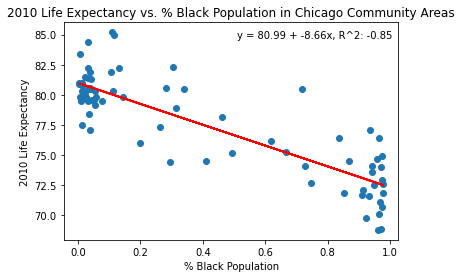

In [43]:
import scipy.stats

x = FINAL["blacks"]
y = FINAL["2010 Life Expectancy"]

plt.figure(facecolor="white")
plt.scatter(x, y)
plt.xlabel("% Black Population")
plt.ylabel("2010 Life Expectancy")
plt.title("2010 Life Expectancy vs. % Black Population in Chicago Community Areas")

m, b, r2, p, std_err = scipy.stats.linregress(x, y)
plt.plot(x, x * m + b, c="red")
plt.text(0.51, 84.7, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(m) + 'x, R^2: ' + '{:.2f}'.format(r2))

plt.savefig("figures/life_race_black.png", bbox_inches="tight")
plt.show()

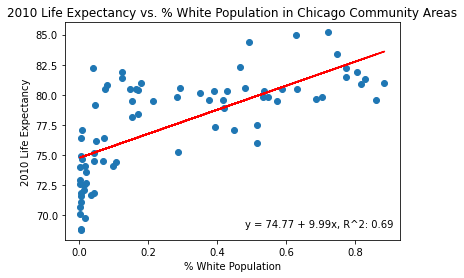

In [42]:
x2 = FINAL["white"]

plt.figure(facecolor="white")
plt.scatter(x2, y)
plt.xlabel("% White Population")
plt.ylabel("2010 Life Expectancy")
plt.title("2010 Life Expectancy vs. % White Population in Chicago Community Areas")

m, b, r2, p, std_err = scipy.stats.linregress(x2, y)
plt.plot(x2, x2 * m + b, c="red")
plt.text(0.48, 69, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(m) + 'x, R^2: ' + '{:.2f}'.format(r2))

plt.savefig("figures/life_race_white.png", bbox_inches="tight")
plt.show()

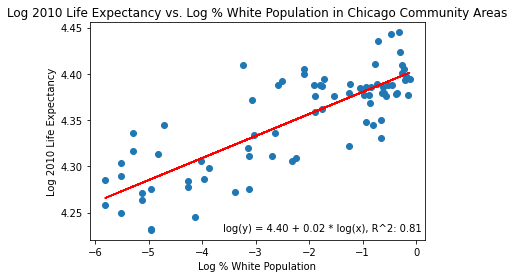

In [44]:
x3 = np.log(x2)
y3 = np.log(y)

plt.figure(facecolor="white")
plt.scatter(x3, y3)
plt.xlabel("Log % White Population")
plt.ylabel("Log 2010 Life Expectancy")
plt.title("Log 2010 Life Expectancy vs. Log % White Population in Chicago Community Areas")

m, b, r2, p, std_err = scipy.stats.linregress(x3, y3)
plt.plot(x3, x3 * m + b, c="red")
plt.text(-3.6, 4.23, 'log(y) = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(m) + ' * log(x), R^2: ' + '{:.2f}'.format(r2))

plt.savefig("figures/life_race_white_log.png", bbox_inches="tight")
plt.show()

In [38]:
predom_white_life = []
predom_not_white_life = []
predom_black_life = []

for index, row in FINAL.iterrows():
    predom_white = False
    if row["white"] > row["blacks"] and row["white"] > row["latinos"] and row["white"] > row["asian"] and row["white"] > row["other"]:
        predom_white_life.append(row["2010 Life Expectancy"])
        predom_white = True
    elif row["blacks"] > row["white"] and row["blacks"] > row["latinos"] and row["blacks"] > row["asian"] and row["blacks"] > row["other"]:
        predom_black_life.append(row["2010 Life Expectancy"])

    if not predom_white:
        predom_not_white_life.append(row["2010 Life Expectancy"])

print(predom_black_life, len(predom_black_life))
print(predom_white_life, len(predom_white_life))
print(predom_not_white_life, len(predom_not_white_life))

[71.9, 68.8, 71.7, 72.1, 74.1, 73.6, 69.8, 74.1, 80.5, 68.9, 74.5, 72.5, 74.0, 74.7, 72.7, 71.9, 77.1, 72.9, 76.4, 76.2, 71.6, 76.4, 75.2, 70.1, 70.7, 71.1, 78.2, 72.6, 74.9, 75.3] 30
[77.3, 80.3, 76.0, 80.5, 81.5, 81.9, 81.3, 85.2, 81.0, 80.9, 79.7, 83.4, 84.4, 80.3, 79.8, 79.5, 78.9, 85.0, 80.6, 82.3, 79.8, 80.2, 77.5, 80.5, 79.6, 82.2, 79.8] 27
[80.6, 79.6, 79.6, 79.5, 80.5, 79.8, 80.3, 74.5, 71.9, 68.8, 71.7, 72.1, 82.2, 81.4, 81.9, 74.1, 73.6, 69.8, 74.1, 80.5, 68.9, 74.5, 72.5, 74.0, 74.7, 72.7, 71.9, 77.1, 72.9, 76.4, 76.2, 78.4, 71.6, 76.4, 77.1, 79.5, 80.8, 80.4, 74.4, 81.0, 79.2, 80.5, 75.2, 70.1, 70.7, 71.1, 78.2, 72.6, 74.9, 75.3] 50


In [46]:
import scipy.stats as stats

print(np.var(predom_white_life), np.var(predom_black_life))

print("2 Sample T-Test for Difference in Life Expectancy between Predominantly White and Black Community Areas in Chicago")
stat, p_value = stats.ttest_ind(a=predom_white_life, b=predom_black_life, equal_var=True)
print("Standard Test Statistic: " + str(stat) + " | p-value: " + str(p_value))

stat, p_value = stats.ttest_ind(a=predom_white_life, b=predom_black_life, equal_var=False)
print("Welch's Test Statistic: " + str(stat) + " | p-value: " + str(p_value))

print("2 Sample T-Test for Difference in Life Expectancy between Predominantly White and Non-White Community Areas in Chicago")
stat, p_value = stats.ttest_ind(a=predom_white_life, b=predom_not_white_life, equal_var=True)
print("Standard Test Statistic: " + str(stat) + " | p-value: " + str(p_value))

stat, p_value = stats.ttest_ind(a=predom_white_life, b=predom_not_white_life, equal_var=False)
print("Welch's Test Statistic: " + str(stat) + " | p-value: " + str(p_value))

4.480027434842255 7.283388888888893
2 Sample T-Test for Difference in Life Expectancy between Predominantly White and Black Community Areas in Chicago
Standard Test Statistic: 10.978429930065762 | p-value: 1.7725226986262415e-15
Welch's Test Statistic: 11.118428547767266 | p-value: 1.3830793793874273e-15
2 Sample T-Test for Difference in Life Expectancy between Predominantly White and Non-White Community Areas in Chicago
Standard Test Statistic: 5.9204932249901825 | p-value: 9.013588770337892e-08
Welch's Test Statistic: 6.961006894411142 | p-value: 1.1031906498815033e-09
